In [1]:
import shapely.geometry as sh
import xarray as xr
import numpy as np

In [2]:
import json 
import geojson

In [10]:
with open("../../GeoData/ZonesSympo/zones_sympo_4326.json","r") as fp: 
    poly_geo = json.load(fp)

## Create one json file that includes all individual zones sympo of one department

In [4]:
dpt_nb=["41"]#["34","41","29","38"]

# list of the zones sympo id in the json file (zones_sympo_4326.json)
zs_json=[poly_geo["features"][i]["properties"]["id"] for i in range(len(poly_geo["features"]))]

feature = []
#feature = poly_geo.copy()
#feature["features"]=[]

for idpt, dpt in enumerate(dpt_nb):
        
    if idpt==0:
        fname_mask = '../../GeoData/zones_sympo_multiples/'+dpt+'_mask_zones_sympos.nc'
        da_mask = xr.open_dataarray(fname_mask)    
        zsl_nc=da_mask.id.values.tolist()
                
        for izs,zs_nc in enumerate(zsl_nc):
            if zs_nc != "departement":
                
                #print(zs_nc)
                
                zs_val=zs_nc.split('+')
                
                if len(zs_val)==1:
                    
                    #print("passe ici?")
                    id_json=zs_json.index(zs_val[0])
                    #print(id_json)
                    shape = sh.asShape(poly_geo["features"][id_json]["geometry"])

                    feature.append(geojson.Feature(geometry=shape,properties = {"id":zs_val[0]}))
                        
    data = geojson.FeatureCollection(feature) 
    with open("../../GeoData/ZonesSympo/zones_sympo_"+str(dpt)+".json","w") as f:
        geojson.dump(data,f)

In [4]:
with open("../../GeoData/ZonesSympo/zones_sympo_41.json","r") as fp: 
    geo = json.load(fp)
#geo

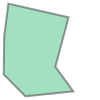

In [26]:
### brouillon union of zones
shape1 = sh.asShape(poly_geo["features"][0]["geometry"])
#shape1
shape2 = sh.asShape(poly_geo["features"][1]["geometry"])
shape3= sh.asShape(poly_geo["features"][2]["geometry"])
feature = []
feature.append(geojson.Feature(geometry=shape1.union(shape2).union(shape3),properties = {"id":"1_2"}))

shape = sh.asShape(feature[0]["geometry"])
shape

In [ ]:
feature.append(geojson.Feature(geometry=shape1.union(shape2),properties = {"id":"1_2"}))
feature.append(geojson.Feature(geometry=shape3.union(shape2),properties = {"id":"2_3"}))
data = geojson.FeatureCollection(feature) 
with open("test.geojson","w") as f: 
        geojson.dump(data,f)
        
with open("test.geojson","r") as fp: 
    poly_geo2 = json.load(fp)

In [7]:
fname_mask = '../../GeoData/zones_sympo_multiples/'+"41"+'_mask_zones_sympos.nc'
da_mask = xr.open_dataarray(fname_mask)
zs_l=[zs for zs in da_mask.id.values.tolist() if "+" not in zs]
zs_N=len(zs_l)
da_zone=da_mask.isel(id=slice(1,zs_N)).load()
print(zs_l[1:zs_N])

['4101', '4102', '4103', '4104', '4105', '4106']


In [7]:
# brouillon pour test sur my_notebook/xarray_map.py (dans def get_sympo_zone(self))
zsympo = "../../GeoData/ZonesSympo/zones_sympo_41.json"
with open(zsympo) as geojson1:
    poly_geojson = json.load(geojson1)
    
[poly_geojson["features"][i]["properties"]["id"] for i in range(len(poly_geojson["features"]))]

['4101', '4102', '4103', '4104', '4105', '4106']

## Create one json file that includes all combinations of the individual zones sympo of one department (as proposed by Mary)

In [8]:
poly_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[0.8328, 48.103531],
      [0.967032, 48.105175],
      [1.019827, 48.141753],
      [1.047134, 48.12407],
      [1.047134, 48.12407],
      [0.994338, 48.087504],
      [1.074854, 48.088398],
      [1.075285, 48.070416],
      [1.128946, 48.070981],
      [1.12977, 48.035016],
      [1.156583, 48.035289],
      [1.211361, 47.981867],
      [1.211361, 47.981867],
      [1.131827, 47.945099],
      [1.159396, 47.909404],
      [1.133466, 47.873163],
      [1.106318, 47.890869],
      [0.974943, 47.799464],
      [0.949194, 47.76318],
      [0.895847, 47.762533],
      [0.868675, 47.780184],
      [0.815312, 47.7795],
      [0.815829, 47.761516],
      [0.762485, 47.760807],
      [0.734726, 47.796411],
      [0.734726, 47.796411],
      [0.786525, 47.851082],
      [0.758198, 47.904673],
      [0.812206, 47.8874],
      [0.837411, 47.941695],
      [0.834853, 48.031606

In [49]:
da_mask

<xarray.DataArray 'mask' (id: 31, latitude: 96, longitude: 169)>
[502944 values with dtype=float32]
Coordinates:
    heightAboveGround  int64 ...
    time               datetime64[ns] ...
    valid_time         datetime64[ns] ...
    step               timedelta64[ns] ...
  * latitude           (latitude) float64 47.2 47.21 47.22 ... 48.13 48.14 48.15
  * longitude          (longitude) float64 0.57 0.58 0.59 0.6 ... 2.23 2.24 2.25
  * id                 (id) object 'departement' ... '4102+4103+4104+4105+4106'

In [86]:
dpt_nb=["41"]#["34","41","29","38"]

# list of the zones sympo id in the json file (zones_sympo_4326.json)
zs_json=[poly_geo["features"][i]["properties"]["id"] for i in range(len(poly_geo["features"]))]

feature = []
#feature = poly_geo.copy()
#feature["features"]=[]

for idpt, dpt in enumerate(dpt_nb):
        
    if idpt==0:
        fname_mask = '../../GeoData/zones_sympo_multiples/'+dpt+'_mask_zones_sympos.nc'
        da_mask = xr.open_dataarray(fname_mask)    
        zsl_nc=da_mask.id.values.tolist()
                
        for izs,zs_nc in enumerate(zsl_nc):
            if izs >-1: # (this one was for testing) izs < 10:
                # construct the departement from all individual zone sympo
                if zs_nc == "departement":
                    individual_zs=[zs for zs in da_mask.id.values.tolist()[1:] if "+" not in zs]
                    print(individual_zs)
                    for j,zs in enumerate(individual_zs):
                        if j==0:
                            id_json=zs_json.index(zs)
                            shape = sh.asShape(poly_geo["features"][id_json]["geometry"])
                        else:
                            id_json=zs_json.index(zs)
                            shape=shape.union(sh.asShape(poly_geo["features"][id_json]["geometry"]))
                    feature.append(geojson.Feature(geometry=shape,properties = {"id":zs_nc}))
                                
                # construct all other zones
                else:                
                    zs_val=zs_nc.split('+')

                    # construct individual zones
                    if len(zs_val)==1:
                        id_json=zs_json.index(zs_val[0])
                        shape = sh.asShape(poly_geo["features"][id_json]["geometry"])
                        feature.append(geojson.Feature(geometry=shape,properties = {"id":zs_val[0]}))

                    # construct combined zones
                    else:
                        for j,zs in enumerate(zs_val):
                            if j==0:
                                id_json=zs_json.index(zs)
                                shape = sh.asShape(poly_geo["features"][id_json]["geometry"])
                            else: 
                                id_json=zs_json.index(zs)
                                shape=shape.union(sh.asShape(poly_geo["features"][id_json]["geometry"]))
                        feature.append(geojson.Feature(geometry=shape,properties = {"id":zs_nc}))
                                                
    data = geojson.FeatureCollection(feature) 
    with open("../../GeoData/ZonesSympo/zones_sympo_combined_"+str(dpt)+".json","w") as f:
        geojson.dump(data,f)

['4101', '4102', '4103', '4104', '4105', '4106']


In [87]:
with open("../../GeoData/ZonesSympo/zones_sympo_combined_41.json","r") as fp: 
    geo = json.load(fp)
geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[0.8328, 48.103531],
      [0.967032, 48.105175],
      [1.019827, 48.141753],
      [1.047134, 48.12407],
      [0.994338, 48.087504],
      [1.074854, 48.088398],
      [1.075285, 48.070416],
      [1.128946, 48.070981],
      [1.12977, 48.035016],
      [1.156583, 48.035289],
      [1.211361, 47.981867],
      [1.292076, 47.964628],
      [1.372409, 47.965318],
      [1.452141, 48.001922],
      [1.532807, 47.984517],
      [1.559596, 47.984698],
      [1.533355, 47.948548],
      [1.533629, 47.930563],
      [1.560655, 47.912759],
      [1.587917, 47.876962],
      [1.534995, 47.840636],
      [1.535268, 47.82265],
      [1.562501, 47.786858],
      [1.562764, 47.768871],
      [1.589951, 47.733072],
      [1.616612, 47.73324],
      [1.616368, 47.751227],
      [1.66971, 47.751545],
      [1.723261, 47.733851],
      [1.723677, 47.697876],
      [1.777535, 47.644

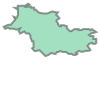

In [88]:
shape=sh.asShape(geo["features"][0]["geometry"])
shape

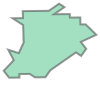

In [77]:
shape=sh.asShape(geo["features"][1]["geometry"])
shape

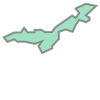

In [78]:
shape=sh.asShape(geo["features"][2]["geometry"])
shape

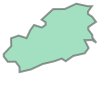

In [79]:
shape=sh.asShape(geo["features"][3]["geometry"])
shape

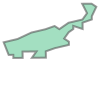

In [80]:
shape=sh.asShape(geo["features"][4]["geometry"])
shape

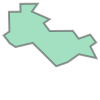

In [81]:
shape=sh.asShape(geo["features"][5]["geometry"])
shape

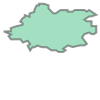

In [82]:
shape=sh.asShape(geo["features"][6]["geometry"])
shape

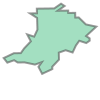

In [83]:
shape=sh.asShape(geo["features"][7]["geometry"])
shape

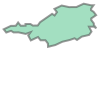

In [84]:
shape=sh.asShape(geo["features"][8]["geometry"])
shape

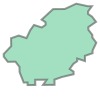

In [85]:
shape=sh.asShape(geo["features"][9]["geometry"])
shape

In [92]:
da_mask.id.values.tolist()[29]

'4101+4102+4103+4105+4106'

In [95]:
import datetime 

In [98]:
date=datetime.datetime(2020,1,26,0)
date.strftime("%Y%m%d%H")

'2020012600'

In [100]:
fileresult='../GeoData/'+'41'+'_'+date.strftime("%Y%m%d%H")+'_'+'4'
fileresult

'../GeoData/41_2020012600_4'